**Run the following two cells before you begin.**

In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('cleaned_data.csv')

**Run the following 3 cells to create a list of features, create a train/test split, and instantiate a random forest classifier.**

In [3]:
features_response = df.columns.tolist()
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[features_response[:-1]].values,
    df['default payment next month'].values,
    test_size=0.2, random_state=24
)

In [5]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=10, criterion='gini', max_depth=3,
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
    max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
    min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
    random_state=4, verbose=0, warm_start=False, class_weight=None
)

**Create a dictionary representing the grid for the `max_depth` and `n_estimators` hyperparameters that will be searched. Include depths of 3, 6, 9, and 12, and 10, 50, 100, and 200 trees.**

In [7]:
params={'max_depth':[3,6,9,12],'n_estimators':[10,50,100,200]}

In [8]:
params

{'max_depth': [3, 6, 9, 12], 'n_estimators': [10, 50, 100, 200]}

________________________________________________________________
**Instantiate a `GridSearchCV` object using the same options that we have previously in this course, but with the dictionary of hyperparameters created above. Set `verbose=2` to see the output for each fit performed.**

In [12]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(rf,param_grid=params,verbose=2,)

____________________________________________________
**Fit the `GridSearchCV` object on the training data.**

In [13]:
grid.fit(X_train,y_train)

E:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.1s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.1s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.1s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.4s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.4s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.4s
[CV] max_depth=3, n_estimators=100 ...................................
[CV] ...........

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  1.3min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=4,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max

___________________________________________________________
**Put the results of the grid search in a pandas DataFrame.**

In [14]:
res=pd.DataFrame(grid.cv_results_)
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.088430,0.003761,0.004987,6.743496e-07,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.813388,0.824895,0.819972,0.819418,0.004714,9
1,0.396273,0.010182,0.020279,4.703026e-04,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.812122,0.820253,0.813080,0.815152,0.003628,14
2,0.824123,0.010846,0.041888,8.150757e-04,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.810997,0.819550,0.811111,0.813886,0.004005,16
3,1.679175,0.033627,0.085438,6.002116e-03,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.811419,0.819409,0.813502,0.814777,0.003384,15
4,0.155272,0.002038,0.007637,1.241485e-03,6,10,"{'max_depth': 6, 'n_estimators': 10}",0.814653,0.823347,0.819972,0.819324,0.003579,11
5,0.668211,0.003731,0.025931,1.410402e-03,6,50,"{'max_depth': 6, 'n_estimators': 50}",0.815919,0.824051,0.821660,0.820543,0.003412,5
6,1.451835,0.082161,0.057481,8.053073e-03,6,100,"{'max_depth': 6, 'n_estimators': 100}",0.815075,0.824332,0.821378,0.820262,0.003861,7
7,2.795535,0.067214,0.107042,8.962870e-03,6,200,"{'max_depth': 6, 'n_estimators': 200}",0.815778,0.824332,0.821941,0.820684,0.003603,3
8,0.202804,0.005316,0.009308,4.735098e-04,9,10,"{'max_depth': 9, 'n_estimators': 10}",0.813247,0.821378,0.816737,0.817121,0.003331,13
9,0.998337,0.024188,0.035576,1.248386e-03,9,50,"{'max_depth': 9, 'n_estimators': 50}",0.814231,0.822644,0.821378,0.819418,0.003704,9


**Find the best hyperparameters from the cross-validation.**

In [15]:
grid.best_params_

{'max_depth': 12, 'n_estimators': 200}

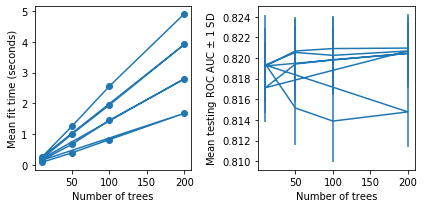

In [16]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
axs[0].plot(res['param_n_estimators'],
            res['mean_fit_time'],
            '-o')
axs[0].set_xlabel('Number of trees')
axs[0].set_ylabel('Mean fit time (seconds)')
axs[1].errorbar(res['param_n_estimators'],
                res['mean_test_score'],
                yerr=res['std_test_score'])
axs[1].set_xlabel('Number of trees')
axs[1].set_ylabel('Mean testing ROC AUC $\pm$ 1 SD ')
plt.tight_layout()

________________________________________________________________________________________________________
**Create a `pcolormesh` visualization of the mean testing score for each combination of hyperparameters.**

<details>
    <summary>Hint:</summary>
    Remember to reshape the values of the mean testing scores to be a two-dimensional 4x4 grid.
</details>

In [17]:
# Create a 5x5 grid
xx, yy = np.meshgrid(range(5), range(5))
print(xx)
print(yy)
print(xx.shape)
print(yy.shape)

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]
[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]]
(5, 5)
(5, 5)


In [18]:
gds_res_mean_ts_rs=res['mean_test_score'].values.reshape(4,4)
gds_res_mean_ts_rs

array([[0.81941775, 0.81515166, 0.81388589, 0.81477662],
       [0.81932399, 0.82054287, 0.82026159, 0.82068351],
       [0.81712062, 0.81941775, 0.81983967, 0.82044911],
       [0.81923023, 0.82068351, 0.82091791, 0.82096479]])

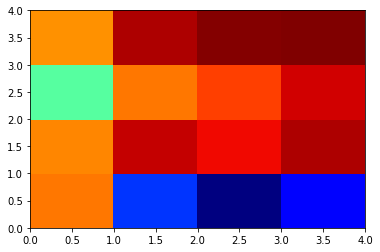

In [19]:
# Set color map to `plt.cm.jet`
ax=plt.axes()
pcolor=ax.pcolormesh(xx,yy,gds_res_mean_ts_rs,cmap=plt.cm.jet)

Text(0, 0.5, 'Y coordinate')

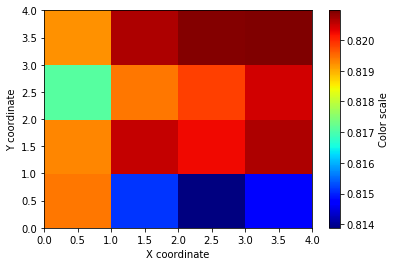

In [20]:
# Visualize pcolormesh
ax=plt.axes()
pcolor=ax.pcolormesh(xx,yy,gds_res_mean_ts_rs,cmap=plt.cm.jet)
plt.colorbar(pcolor, label='Color scale')
ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')

________________________________________________________________________________________________________
**Conclude which set of hyperparameters to use.**

In [21]:
# Create a dataframe of the feature names and importance
gds_feat_imp=pd.DataFrame({'Features':features_response[:-1],'Importance':gds.best_estimator_.feature_importances_})
gds_feat_imp

,Features,Importance
0,LIMIT_BAL,0.059535
1,EDUCATION,0.012878
2,MARRIAGE,0.007874
3,AGE,0.042286
4,PAY_1,0.305754
5,BILL_AMT1,0.053950
6,BILL_AMT2,0.051854
7,BILL_AMT3,0.048852
8,BILL_AMT4,0.045757
9,BILL_AMT5,0.043341


In [22]:
# Sort values by importance
gds_feat_imp.sort_values(by='Importance',ascending=False)

,Features,Importance
4,PAY_1,0.305754
11,PAY_AMT1,0.060074
0,LIMIT_BAL,0.059535
5,BILL_AMT1,0.053950
6,BILL_AMT2,0.051854
12,PAY_AMT2,0.050959
7,BILL_AMT3,0.048852
13,PAY_AMT3,0.048242
10,BILL_AMT6,0.045956
8,BILL_AMT4,0.045757
